<a href="https://colab.research.google.com/github/vinayshanbhag/Colaboratory/blob/master/Affine_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import sin, cos, tan, pi
import string

# Utility function to draw a matrix of row vectors
def draw(m, names = string.ascii_uppercase, title="", linecolor='lightgray', linestyle='dotted'):
  """plot row vectors from matrix m"""
  colors = 'rgbcmyk'#[color for color in mcolors.TABLEAU_COLORS]
  pts_x = []
  pts_y = []
  for idx, row in enumerate(m):
      x, y, _ = row
      pts_x.append(x)
      pts_y.append(y)
      plt.scatter(x, y, color=colors[idx%len(colors)])
      xpos = x+0.5 if x > 0 else x-0.5
      ypos = y+0.9 if y > 0 else y-0.9
      plt.text(xpos, ypos, f"{names[idx]} ({x:{'0.0f' if int(x)==x else '.2f'}},{y:{'0.0f' if int(y)==y else '.2f'}})")
  pts_x.append(pts_x[0])
  pts_y.append(pts_y[0])
  plt.plot(pts_x, pts_y, color=linecolor, linestyle=linestyle);
  scale = int(max(abs(m.min()),abs(m.max())));
  padding = 1
  plt.xlim(-scale-padding, scale+padding)
  plt.ylim(-scale-padding, scale+padding)
  plt.xticks(np.arange(-scale-padding, scale+padding, 1))
  plt.yticks(np.arange(-scale-padding, scale+padding, 1))
  ax = plt.gca().set_aspect('equal', adjustable='box')
  plt.axis('off')
  plt.title(title);

In [0]:
a,b,c,d = [2,1,0],[2,-1,0],[-2,-1,0],[-2,1,0]
M = np.array([a,b,c,d])

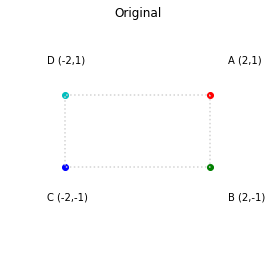

In [350]:
draw(M, title="Original")

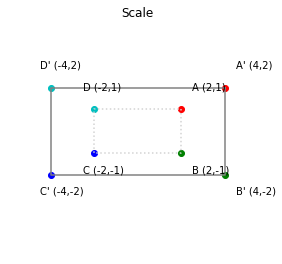

In [351]:
# Scale
scale = lambda w=1,h=1: np.array([[w,0,0],[0,h,0],[0,0,1]])
draw(M)
draw(M @ scale(2,2), names=[f"{n}'" for n in string.ascii_uppercase], title="Scale", linecolor='gray', linestyle='solid')

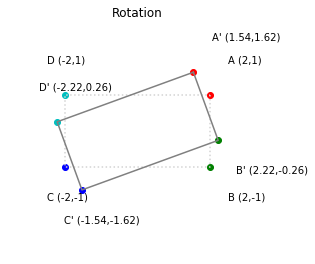

In [352]:
# Rotation matrix - rotate by theta radians
rot = lambda theta: np.array([[cos(theta) ,sin(theta),0],
                              [-sin(theta),cos(theta),0],
                              [0          ,0         ,1]
                             ])
draw(M)
draw(M @ rot(pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Rotation", linecolor='gray', linestyle='solid')

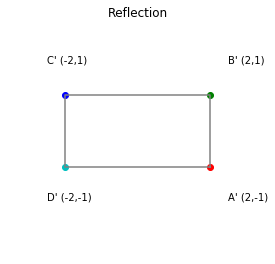

In [353]:
# Affine matrix for reflection

# Reflect around x axis
reflect_x = np.array([
    [ 1, 0,0],
    [ 0,-1,0],
    [ 0, 0,1]
])

# Reflect around y axis
reflect_y = np.array([
    [-1,0,0],
    [ 0,1,0],
    [ 0,0,1]
])

# Reflect around origin
reflect_origin = np.array([
    [-1, 0,0],
    [ 0,-1,0],
    [ 0, 0,1]
])

draw(M @ reflect_x, names=[f"{n}'" for n in string.ascii_uppercase], title="Reflection", linecolor='gray', linestyle='solid')

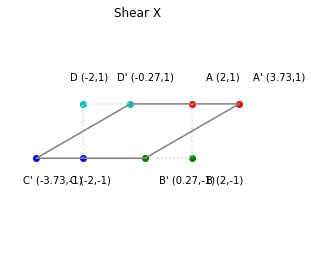

In [354]:
# Shear
shear = lambda phi=0,psi=0: np.array([[1,tan(psi),0],[tan(phi),1,0],[0,0,1]])
draw(M)
draw(M @ shear(pi/3), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear X", linecolor='gray', linestyle='solid')

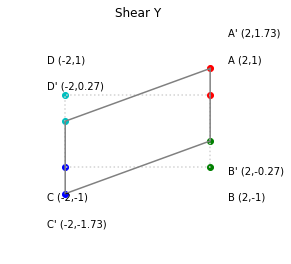

In [355]:
draw(M)
draw(M @ shear(0,pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear Y", linecolor='gray', linestyle='solid')

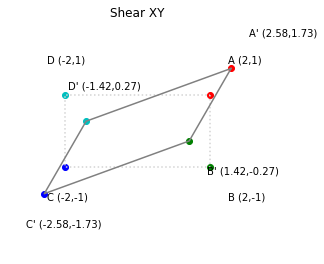

In [356]:
draw(M)
draw(M @ shear(pi/6,pi/9), names=[f"{n}'" for n in string.ascii_uppercase], title="Shear XY", linecolor='gray', linestyle='solid')

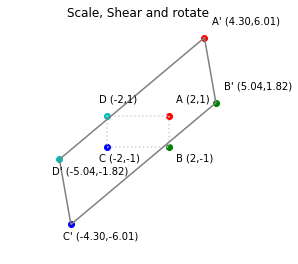

In [357]:
Z = scale(3,2) @ shear(pi/9, pi/18) @ rot(theta)
draw(M)
draw(M @ Z, names=[f"{n}'" for n in string.ascii_uppercase], title="Scale, Shear and rotate", linecolor='gray', linestyle='solid')